# EDA - pre clean 

In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np

from keplergl import KeplerGl
import keplergl

import matplotlib.pyplot as plt


In [ ]:
# import the raw data 

silver_data_eda = pd.read_csv("bronze_data.csv")
silver_data_eda.head()

,BFE-nummer,Adresse,Offentlig ejendomsværdi,Offentlige grundværdi,Seneste handelspris,Enhedsareal - Beboelse,Pris pr. m2,Seneste handelsdato,Seneste handlet andel,Handelsmetode,Anvendelse,Opførelsesår,Tinglyst areal (Ejerlejligheder),Longitude,Latitude,Primær ejers adresse,Vejnavn,Husnr.,Etage,Antal værelser
0,420766,"Else Alfelts Vej 93, 7. th, 2300 København S",kr. 1.950.000,kr. 349.600,kr. 3.950.000,88,kr. 44.886,01/07/2022,100%,Almindelig fri handel,"Etagebolig-bygning, flerfamiliehus eller to-fa...",2014,75,"12,56841568","55,61690988","Else Alfelts Vej 93,7 th, 2300 København S",Else Alfelts Vej,93,7,3
1,109362,"C.F. Møllers Allé 66, 7. tv, 2300 København S",kr. 1.850.000,kr. 351.700,kr. 4.300.000,92,kr. 46.739,01/06/2022,100%,Almindelig fri handel,"Etagebolig-bygning, flerfamiliehus eller to-fa...",2007,76,"12,57771642","55,63446794","C.F. Møllers Allé 66,7 tv, 2300 København S",C.F. Møllers Allé,66,7,3
2,124613,"Lombardigade 19, 3. tv, 2300 København S",kr. 960.000,kr. 70.200,kr. 2.400.000,56,kr. 42.857,01/06/2022,100%,Almindelig fri handel,"Etagebolig-bygning, flerfamiliehus eller to-fa...",1904,48,"12,61348571","55,65432904","Skolegade 10, 4100 Ringsted",Lombardigade,19,3,2
3,103200,"Ved Amagerport 9, 3. th, 2300 København S",kr. 1.600.000,kr. 172.900,kr. 5.050.000,90,kr. 56.111,01/06/2022,100%,Almindelig fri handel,"Etagebolig-bygning, flerfamiliehus eller to-fa...",1913,83,"12,59622212","55,66660875","Ved Amagerport 9,3 th, 2300 København S",Ved Amagerport,9,3,3
4,132843,"Øresundsvej 104, 4. th, 2300 København S",kr. 1.400.000,kr. 124.300,kr. 4.100.000,82,kr. 50.000,01/06/2022,100%,Almindelig fri handel,"Etagebolig-bygning, flerfamiliehus eller to-fa...",1932,74,"12,62117919","55,66122067","Øresundsvej 104,4 th, 2300 København S",Øresundsvej,104,4,4


In [ ]:
#replacing spaces and bind in column names with '_'

silver_data_eda.columns =[col.replace(' ','_') for col in silver_data_eda.columns]
silver_data_eda.columns =[col.replace('-','_') for col in silver_data_eda.columns]
silver_data_eda.columns =[col.replace('.','') for col in silver_data_eda.columns]
silver_data_eda.columns =[col.replace('(','') for col in silver_data_eda.columns]
silver_data_eda.columns =[col.replace(')','') for col in silver_data_eda.columns]
silver_data_eda.columns =[col.replace('___','_') for col in silver_data_eda.columns]

silver_data_eda.dtypes

BFE_nummer                         int64
Adresse                           object
Offentlig_ejendomsværdi           object
Offentlige_grundværdi             object
Seneste_handelspris               object
Enhedsareal_Beboelse              object
Pris_pr_m2                        object
Seneste_handelsdato               object
Seneste_handlet_andel             object
Handelsmetode                     object
Anvendelse                        object
Opførelsesår                      object
Tinglyst_areal_Ejerlejligheder    object
Longitude                         object
Latitude                          object
Primær_ejers_adresse              object
Vejnavn                           object
Husnr                             object
Etage                             object
Antal_værelser                    object
dtype: object

In [ ]:
#change the column names to lower case
silver_data_eda.columns = map(str.lower, silver_data_eda.columns)

In [ ]:
# col types
silver_data_eda.dtypes

bfe_nummer                         int64
adresse                           object
offentlig_ejendomsværdi           object
offentlige_grundværdi             object
seneste_handelspris               object
enhedsareal_beboelse              object
pris_pr_m2                        object
seneste_handelsdato               object
seneste_handlet_andel             object
handelsmetode                     object
anvendelse                        object
opførelsesår                      object
tinglyst_areal_ejerlejligheder    object
longitude                         object
latitude                          object
primær_ejers_adresse              object
vejnavn                           object
husnr                             object
etage                             object
antal_værelser                    object
dtype: object

In [ ]:
#remove characters from columns 

silver_data_eda['offentlig_ejendomsværdi'] = silver_data_eda['offentlig_ejendomsværdi'].str.replace(r'\D', '')
silver_data_eda['offentlige_grundværdi'] = silver_data_eda['offentlige_grundværdi'].str.replace(r'\D', '')
silver_data_eda['seneste_handelspris'] = silver_data_eda['seneste_handelspris'].str.replace(r'\D', '')
silver_data_eda['pris_pr_m2'] = silver_data_eda['pris_pr_m2'].str.replace(r'\D', '')

silver_data_eda['longitude'] = silver_data_eda['longitude'].str.replace(',', '.')
silver_data_eda['latitude'] = silver_data_eda['latitude'].str.replace(',', '.')

silver_data_eda['husnr'] = silver_data_eda['husnr'].str.replace(r'\D', '')



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False

In [ ]:
#remove  
silver_data_eda = silver_data_eda.replace('-', '')

In [ ]:
#split date to each column 
silver_data_eda['seneste_handelsdato']= pd.to_datetime(silver_data_eda['seneste_handelsdato'],format='%d/%m/%Y')

silver_data_eda['year']= silver_data_eda['seneste_handelsdato'].dt.year
silver_data_eda['month']= silver_data_eda['seneste_handelsdato'].dt.month
silver_data_eda['day']= silver_data_eda['seneste_handelsdato'].dt.day

In [ ]:
#remove whitespace in col.

def whitespace_remover(dataframe):

	# iterating over the columns
	for i in dataframe.columns:
		
		# checking datatype of each columns
		if dataframe[i].dtype == 'object':
			
			# applying strip function on column
			dataframe[i] = dataframe[i].str.replace(' ', '')
		else:
			
			# if condn. is False then it will do nothing.
			pass

# applying whitespace_remover function on dataframe
whitespace_remover(silver_data_eda)

In [ ]:
#drop_duplicates
silver_data_eda.drop_duplicates(subset =['bfe_nummer','seneste_handelspris'],keep = False, inplace = True)


In [ ]:
#change building levels to numeric numbers.
#groundfloor == level 1 

# change groundlevel "st" to 0 
silver_data_eda["etage"] = silver_data_eda["etage"].replace("st", "0")

# strings to numeric
silver_data_eda["etage"] = silver_data_eda["etage"].apply(pd.to_numeric) #.astype('int')

# add +1 to floor level, so the model dont think "0" is no value. 
silver_data_eda['etage'] += 1

In [ ]:
#remove  
silver_data_eda = silver_data_eda.replace('-', '')

In [ ]:
# change data types for columns 

silver_data_eda['offentlig_ejendomsværdi'] = silver_data_eda['offentlig_ejendomsværdi'].apply(pd.to_numeric)
silver_data_eda["offentlige_grundværdi"] = silver_data_eda["offentlige_grundværdi"].apply(pd.to_numeric)
silver_data_eda['seneste_handelspris'] = silver_data_eda['seneste_handelspris'].apply(pd.to_numeric)

silver_data_eda['enhedsareal_beboelse'] = silver_data_eda['enhedsareal_beboelse'].apply(pd.to_numeric)
silver_data_eda['pris_pr_m2'] = silver_data_eda['pris_pr_m2'].apply(pd.to_numeric)

silver_data_eda['opførelsesår'] = silver_data_eda['opførelsesår'].apply(pd.to_numeric)
silver_data_eda['tinglyst_areal_ejerlejligheder'] = silver_data_eda['tinglyst_areal_ejerlejligheder'].apply(pd.to_numeric)

silver_data_eda['longitude'] = silver_data_eda['longitude'].apply(pd.to_numeric)
silver_data_eda['latitude'] = silver_data_eda['latitude'].apply(pd.to_numeric)

silver_data_eda['antal_værelser'] = silver_data_eda['antal_værelser'].apply(pd.to_numeric)

silver_data_eda['etage'] = silver_data_eda['etage'].apply(pd.to_numeric)

#silver_data_eda['seneste_handlet_andel'] = silver_data_eda['seneste_handlet_andel'].apply(pd.to_numeric)
#silver_data_eda['husnr'] = silver_data_eda['husnr'].apply(pd.to_numeric)


In [ ]:
silver_data_eda

,bfe_nummer,adresse,offentlig_ejendomsværdi,offentlige_grundværdi,seneste_handelspris,enhedsareal_beboelse,pris_pr_m2,seneste_handelsdato,seneste_handlet_andel,handelsmetode,...,longitude,latitude,primær_ejers_adresse,vejnavn,husnr,etage,antal_værelser,year,month,day
0,420766,"ElseAlfeltsVej93,7.th,2300KøbenhavnS",1950000.0,349600.0,3950000,88.0,44886.0,2022-07-01,100%,Almindeligfrihandel,...,12.568416,55.616910,"ElseAlfeltsVej93,7th,2300KøbenhavnS",ElseAlfeltsVej,93,8.0,3,2022,7,1
1,109362,"C.F.MøllersAllé66,7.tv,2300KøbenhavnS",1850000.0,351700.0,4300000,92.0,46739.0,2022-06-01,100%,Almindeligfrihandel,...,12.577716,55.634468,"C.F.MøllersAllé66,7tv,2300KøbenhavnS",C.F.MøllersAllé,66,8.0,3,2022,6,1
2,124613,"Lombardigade19,3.tv,2300KøbenhavnS",960000.0,70200.0,2400000,56.0,42857.0,2022-06-01,100%,Almindeligfrihandel,...,12.613486,55.654329,"Skolegade10,4100Ringsted",Lombardigade,19,4.0,2,2022,6,1
3,103200,"VedAmagerport9,3.th,2300KøbenhavnS",1600000.0,172900.0,5050000,90.0,56111.0,2022-06-01,100%,Almindeligfrihandel,...,12.596222,55.666609,"VedAmagerport9,3th,2300KøbenhavnS",VedAmagerport,9,4.0,3,2022,6,1
4,132843,"Øresundsvej104,4.th,2300KøbenhavnS",1400000.0,124300.0,4100000,82.0,50000.0,2022-06-01,100%,Almindeligfrihandel,...,12.621179,55.661221,"Øresundsvej104,4th,2300KøbenhavnS",Øresundsvej,104,5.0,4,2022,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,107328,"Myggenæsgade3,1.4,2300KøbenhavnS",2450000.0,386900.0,3700000,90.0,41111.0,2019-01-02,100%,Almindeligfrihandel,...,12.584155,55.665330,"Myggenæsgade3,1,-4,2300KøbenhavnS",Myggenæsgade,3,2.0,3,2019,1,2
4366,130268,"Siciliensgade11,5.th,2300KøbenhavnS",580000.0,53400.0,1295000,32.0,40468.0,2019-01-02,100%,Almindeligfrihandel,...,12.618511,55.652964,"Brigadevej50,st,-124,2300KøbenhavnS",Siciliensgade,11,6.0,1,2019,1,2
4367,134871,"Holmbladsgade70A,4.tv,2300KøbenhavnS",1850000.0,110700.0,3650000,94.0,38829.0,2019-01-02,100%,Almindeligfrihandel,...,12.611411,55.665193,"Holmbladsgade70A,4tv,2300KøbenhavnS",Holmbladsgade,70,5.0,3,2019,1,2
4368,138884,"Hyacintgården9,1.3,2300KøbenhavnS",560000.0,82200.0,1175000,34.0,34558.0,2019-01-02,100%,Almindeligfrihandel,...,12.612206,55.648623,"Bomhusvej18F,2th,2100KøbenhavnØ",Hyacintgården,9,2.0,1,2019,1,2


In [ ]:
# set the date period for the data
silver_data_eda = silver_data_eda[(silver_data_eda['seneste_handelsdato'] > '2019-1-1') & (silver_data_eda['seneste_handelsdato'] <= '2022-3-31')]

In [ ]:
#missing values 

#silver_data_eda.info() 
silver_data_eda.isnull().sum()

bfe_nummer                          0
adresse                             0
offentlig_ejendomsværdi            60
offentlige_grundværdi              60
seneste_handelspris                 0
enhedsareal_beboelse                1
pris_pr_m2                          1
seneste_handelsdato                 0
seneste_handlet_andel               0
handelsmetode                       0
anvendelse                          0
opførelsesår                      180
tinglyst_areal_ejerlejligheder      1
longitude                           0
latitude                            0
primær_ejers_adresse                0
vejnavn                             0
husnr                               0
etage                              58
antal_værelser                      0
year                                0
month                               0
day                                 0
dtype: int64

In [ ]:
#remove rows where null appears 
silver_data_eda = silver_data_eda.dropna()
silver_data_eda.isnull().sum()

bfe_nummer                        0
adresse                           0
offentlig_ejendomsværdi           0
offentlige_grundværdi             0
seneste_handelspris               0
enhedsareal_beboelse              0
pris_pr_m2                        0
seneste_handelsdato               0
seneste_handlet_andel             0
handelsmetode                     0
anvendelse                        0
opførelsesår                      0
tinglyst_areal_ejerlejligheder    0
longitude                         0
latitude                          0
primær_ejers_adresse              0
vejnavn                           0
husnr                             0
etage                             0
antal_værelser                    0
year                              0
month                             0
day                               0
dtype: int64

In [ ]:
#remove rows with 0. Somehow the rows didn’t get removed before
silver_data_eda = silver_data_eda[silver_data_eda.offentlige_grundværdi != 0]

In [ ]:
silver_data_eda

,bfe_nummer,adresse,offentlig_ejendomsværdi,offentlige_grundværdi,seneste_handelspris,enhedsareal_beboelse,pris_pr_m2,seneste_handelsdato,seneste_handlet_andel,handelsmetode,...,longitude,latitude,primær_ejers_adresse,vejnavn,husnr,etage,antal_værelser,year,month,day
99,111445,"AmagerBoulevard110,st.tv,2300KøbenhavnS",2250000.0,326700.0,6200000,114.0,54385.0,2022-03-25,100%,Almindeligfrihandel,...,12.593788,55.666513,"Stenrosevej1A,2300KøbenhavnS",AmagerBoulevard,110,1.0,4,2022,3,25
100,103789,"Weidekampsgade61,st.th,2300KøbenhavnS",2100000.0,404900.0,4000000,83.0,48192.0,2022-03-24,100%,Almindeligfrihandel,...,12.581636,55.667398,"Weidekampsgade61,stth,2300KøbenhavnS",Weidekampsgade,61,1.0,2,2022,3,24
101,135089,"Marengovej12,1.tv,2300KøbenhavnS",1350000.0,167400.0,3845000,78.0,49294.0,2022-03-21,100%,Almindeligfrihandel,...,12.621136,55.658203,"Højdevej36,2th,2300KøbenhavnS",Marengovej,12,2.0,4,2022,3,21
103,132821,"Elbagade21,4.th,2300KøbenhavnS",1050000.0,97500.0,2375000,62.0,38306.0,2022-03-15,100%,Almindeligfrihandel,...,12.613412,55.653728,"VibyAlle42,2770Kastrup",Elbagade,21,5.0,2,2022,3,15
104,131622,"Caprivej2,1.tv,2300KøbenhavnS",960000.0,82000.0,2725000,56.0,48660.0,2022-03-15,100%,Almindeligfrihandel,...,12.621147,55.660681,"Caprivej2,1tv,2300KøbenhavnS",Caprivej,2,2.0,2,2022,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,107328,"Myggenæsgade3,1.4,2300KøbenhavnS",2450000.0,386900.0,3700000,90.0,41111.0,2019-01-02,100%,Almindeligfrihandel,...,12.584155,55.665330,"Myggenæsgade3,1,-4,2300KøbenhavnS",Myggenæsgade,3,2.0,3,2019,1,2
4366,130268,"Siciliensgade11,5.th,2300KøbenhavnS",580000.0,53400.0,1295000,32.0,40468.0,2019-01-02,100%,Almindeligfrihandel,...,12.618511,55.652964,"Brigadevej50,st,-124,2300KøbenhavnS",Siciliensgade,11,6.0,1,2019,1,2
4367,134871,"Holmbladsgade70A,4.tv,2300KøbenhavnS",1850000.0,110700.0,3650000,94.0,38829.0,2019-01-02,100%,Almindeligfrihandel,...,12.611411,55.665193,"Holmbladsgade70A,4tv,2300KøbenhavnS",Holmbladsgade,70,5.0,3,2019,1,2
4368,138884,"Hyacintgården9,1.3,2300KøbenhavnS",560000.0,82200.0,1175000,34.0,34558.0,2019-01-02,100%,Almindeligfrihandel,...,12.612206,55.648623,"Bomhusvej18F,2th,2100KøbenhavnØ",Hyacintgården,9,2.0,1,2019,1,2


# EDA

## Map visualisation 

In [ ]:
map_1 = keplergl.KeplerGl(height=600, data={'data_1': silver_data_eda})
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':       bfe_nummer                                  adresse  \
99        111445  Amager…

In [ ]:
print (silver_data_eda.seneste_handelsdato.min()), (silver_data_eda.seneste_handelsdato.max())


2019-01-02 00:00:00


(None, Timestamp('2022-03-25 00:00:00'))

In [ ]:
silver_data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3762 entries, 99 to 4369
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   bfe_nummer                      3762 non-null   int64         
 1   adresse                         3762 non-null   object        
 2   offentlig_ejendomsværdi         3762 non-null   float64       
 3   offentlige_grundværdi           3762 non-null   float64       
 4   seneste_handelspris             3762 non-null   int64         
 5   enhedsareal_beboelse            3762 non-null   float64       
 6   pris_pr_m2                      3762 non-null   float64       
 7   seneste_handelsdato             3762 non-null   datetime64[ns]
 8   seneste_handlet_andel           3762 non-null   object        
 9   handelsmetode                   3762 non-null   object        
 10  anvendelse                      3762 non-null   object        
 11  opf

In [ ]:
# export describe data for viz in tableau 

describe_df = pd.DataFrame()
describe_df = silver_data_eda.describe().transpose()
describe_df.to_csv("describe_df.csv")
silver_data_eda.to_csv("silver_data_eda_tableau.csv")

describe_df

,count,mean,std,min,25%,50%,75%,max
bfe_nummer,3762.0,1.689485e+05,1.632462e+06,101006.000000,1.133960e+05,1.316655e+05,1.361198e+05,1.001793e+08
offentlig_ejendomsværdi,3762.0,1.578929e+06,7.977362e+05,280000.000000,9.600000e+05,1.300000e+06,2.050000e+06,6.850000e+06
offentlige_grundværdi,3762.0,2.428748e+05,1.685367e+05,37200.000000,1.047000e+05,1.683000e+05,3.740000e+05,1.141300e+06
seneste_handelspris,3762.0,3.390777e+06,1.606765e+06,920000.000000,2.225000e+06,3.020000e+06,4.143750e+06,1.550000e+07
enhedsareal_beboelse,3762.0,7.984317e+01,2.844443e+01,25.000000,5.700000e+01,7.400000e+01,1.000000e+02,2.240000e+02
pris_pr_m2,3762.0,4.181644e+04,8.242580e+03,16120.000000,3.617000e+04,4.076700e+04,4.615300e+04,9.063700e+04
opførelsesår,3762.0,1.961077e+03,4.099959e+01,1872.000000,1.932000e+03,1.940000e+03,2.006000e+03,2.021000e+03
tinglyst_areal_ejerlejligheder,3762.0,7.166534e+01,2.655567e+01,23.000000,5.100000e+01,6.700000e+01,8.900000e+01,3.020000e+02
longitude,3762.0,1.260033e+01,1.894322e-02,12.564008,1.258153e+01,1.260572e+01,1.261607e+01,1.263511e+01
latitude,3762.0,5.565423e+01,1.358117e-02,55.616537,5.565061e+01,5.565941e+01,5.566392e+01,5.566870e+01


In [ ]:
pd.DataFrame(silver_data_eda[[
    'offentlig_ejendomsværdi',
    'offentlige_grundværdi',
    'seneste_handelspris',
    'enhedsareal_beboelse',
    'pris_pr_m2',
    'etage',
    'antal_værelser'
    ]].describe())

,offentlig_ejendomsværdi,offentlige_grundværdi,seneste_handelspris,enhedsareal_beboelse,pris_pr_m2,etage,antal_værelser
count,3.762000e+03,3.762000e+03,3.762000e+03,3762.000000,3762.000000,3762.000000,3762.000000
mean,1.578929e+06,2.428748e+05,3.390777e+06,79.843169,41816.437267,3.570441,2.671451
std,7.977362e+05,1.685367e+05,1.606765e+06,28.444433,8242.580183,2.130409,0.931004
min,2.800000e+05,3.720000e+04,9.200000e+05,25.000000,16120.000000,1.000000,1.000000
25%,9.600000e+05,1.047000e+05,2.225000e+06,57.000000,36170.000000,2.000000,2.000000
50%,1.300000e+06,1.683000e+05,3.020000e+06,74.000000,40767.000000,3.000000,3.000000
75%,2.050000e+06,3.740000e+05,4.143750e+06,100.000000,46153.000000,5.000000,3.000000
max,6.850000e+06,1.141300e+06,1.550000e+07,224.000000,90637.000000,16.000000,7.000000


In [ ]:
# median 

pd.DataFrame(silver_data_eda[[
    'offentlig_ejendomsværdi',
    'offentlige_grundværdi',
    'seneste_handelspris',
    'enhedsareal_beboelse',
    'pris_pr_m2',
    'etage',
    'antal_værelser'
    ]].median())

,0
offentlig_ejendomsværdi,1300000.0
offentlige_grundværdi,168300.0
seneste_handelspris,3020000.0
enhedsareal_beboelse,74.0
pris_pr_m2,40767.0
etage,3.0
antal_værelser,3.0


### Count of deals per year

In [ ]:
data_2019 = silver_data_eda.loc[silver_data_eda['year'] == 2019] 
data_2020 = silver_data_eda.loc[silver_data_eda['year'] == 2020]
data_2021 = silver_data_eda.loc[silver_data_eda['year'] == 2021]
data_2022 = silver_data_eda.loc[silver_data_eda['year'] == 2022]

In [ ]:
data_2019.describe()

,bfe_nummer,offentlig_ejendomsværdi,offentlige_grundværdi,seneste_handelspris,enhedsareal_beboelse,pris_pr_m2,opførelsesår,tinglyst_areal_ejerlejligheder,longitude,latitude,etage,antal_værelser,year,month,day
count,867.000000,8.670000e+02,8.670000e+02,8.670000e+02,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.0,867.000000,867.000000
mean,142551.795848,1.639389e+06,2.449747e+05,3.158215e+06,80.595156,38220.346021,1959.600923,72.380623,12.600062,55.655167,3.587082,2.696655,2019.0,6.910035,4.690888
std,71346.653576,8.759715e+05,1.741388e+05,1.607799e+06,29.246877,7185.693985,41.034120,27.198067,0.019164,0.013148,2.059220,0.928892,0.0,3.181751,6.688133
min,101006.000000,4.200000e+05,4.660000e+04,1.000000e+06,26.000000,18390.000000,1872.000000,23.000000,12.564008,55.616567,1.000000,1.000000,2019.0,1.000000,1.000000
25%,112034.500000,9.600000e+05,1.052000e+05,2.020000e+06,58.000000,33595.500000,1931.000000,52.000000,12.580944,55.653032,2.000000,2.000000,2019.0,4.000000,1.000000
50%,131083.000000,1.350000e+06,1.658000e+05,2.745000e+06,76.000000,37087.000000,1940.000000,68.000000,12.606193,55.660061,3.000000,3.000000,2019.0,7.000000,1.000000
75%,135920.500000,2.100000e+06,3.746000e+05,3.900000e+06,100.000000,41322.000000,2006.000000,89.500000,12.616111,55.664579,5.000000,3.000000,2019.0,10.000000,4.000000
max,428396.000000,6.850000e+06,1.141300e+06,1.550000e+07,220.000000,81081.000000,2021.000000,213.000000,12.634728,55.668704,14.000000,6.000000,2019.0,12.000000,31.000000


## Outlier detection - viz

<AxesSubplot:>

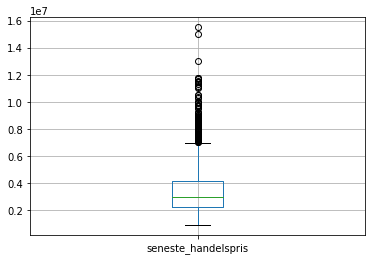

In [ ]:
silver_data_eda[["seneste_handelspris"]].boxplot()

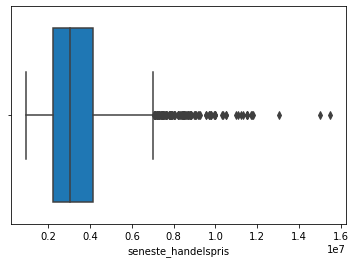

In [ ]:
#outlier detection - boxplot 
ax = sns.boxplot(x=silver_data_eda["seneste_handelspris"], data=silver_data_eda, saturation=1.75, width=0.8)

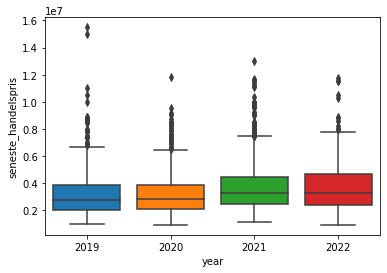

In [ ]:
ax = sns.boxplot(x="year", y="seneste_handelspris", data=silver_data_eda, saturation=1.75, width=0.8)

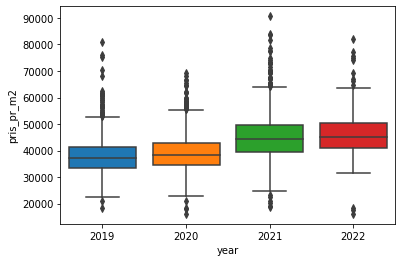

In [ ]:
ax = sns.boxplot(x="year", y="pris_pr_m2", data=silver_data_eda, saturation=1.75, width=0.8)

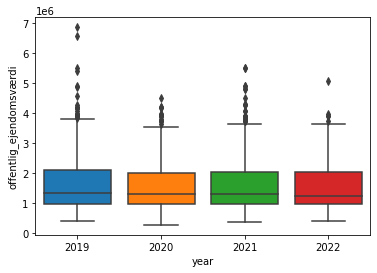

In [ ]:
ax = sns.boxplot(x="year", y="offentlig_ejendomsværdi", data=silver_data_eda, saturation=1.75, width=0.8)

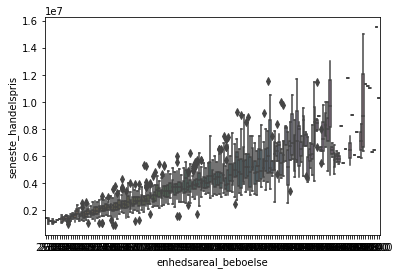

In [ ]:
ax = sns.boxplot(x="enhedsareal_beboelse", y="seneste_handelspris", data=silver_data_eda, saturation=0.4, width=0.8)

### Use z_score to remove outliers

In [ ]:
mean = np.mean(silver_data_eda["seneste_handelspris"])
std = np.std(silver_data_eda["seneste_handelspris"])
median = np.median(silver_data_eda["seneste_handelspris"])
print('mean of the dataset is', mean)
print('std. deviation is', std)
print('median of the data is', median)


"""
A normal distribution is shown below and it is estimated that
68% of the data points lie between +/- 1 standard deviation.
95% of the data points lie between +/- 2 standard deviation
99.7% of the data points lie between +/- 3 standard deviation
"""

threshold = 2
outlier = []
for i in silver_data_eda["seneste_handelspris"]:
	z = (i-mean)/std
	if z > threshold:
		outlier.append(i)
print('outlier in dataset is', outlier)

print('len', len(outlier))
print('max', max(outlier))
print('min', min(outlier))

mean of the dataset is 3390777.4191919193
std. deviation is 1606551.4702783043
median of the data is 3020000.0
outlier in dataset is [6800000, 8600000, 8775000, 7625000, 11500000, 6900000, 8200000, 8850000, 6850000, 7315000, 6950000, 10500000, 10300000, 7510000, 11750000, 8000000, 6695000, 7400000, 8020000, 11500000, 7795000, 7150000, 7995000, 9950000, 10000000, 6795000, 7767000, 6775000, 7200000, 8445000, 7620000, 9050000, 7825000, 6650000, 7500000, 7050000, 11500000, 10000000, 9245000, 8498000, 6775000, 7350000, 7495000, 6875000, 7450000, 7000000, 7500000, 11700000, 9800000, 6650000, 8495000, 7995000, 6750000, 6875000, 7900000, 9150000, 13025000, 7800000, 6645000, 7695000, 6975000, 6795000, 6895000, 11200000, 9800000, 6995000, 11100000, 6800000, 6995000, 7095000, 7800000, 8200000, 8325000, 6815000, 6950000, 9725000, 9550000, 11511000, 6650000, 7545000, 7650000, 8250000, 8375000, 7475000, 9011100, 7450000, 7100000, 6650000, 10350000, 6750000, 6950000, 7995000, 6935000, 9000000, 700000

<AxesSubplot:>

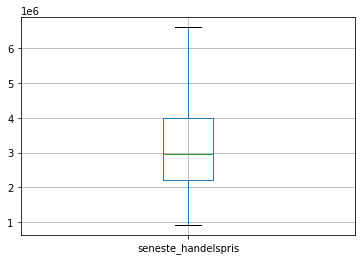

In [ ]:
silver_without_outlier = silver_data_eda.loc[silver_data_eda['seneste_handelspris'] < min(outlier) ]

silver_without_outlier[['seneste_handelspris']].boxplot()

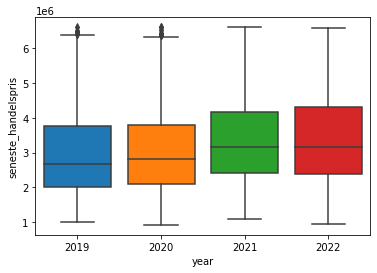

In [ ]:
ax = sns.boxplot(x="year", y="seneste_handelspris", data=silver_without_outlier, saturation=1.75, width=0.8)

### Sqm price and sold price over time

<AxesSubplot:xlabel='seneste_handelsdato', ylabel='pris_pr_m2'>

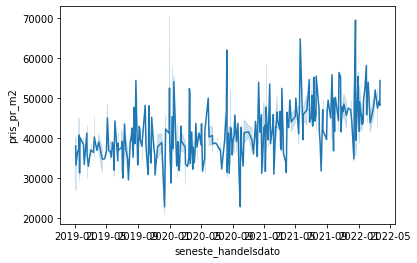

In [ ]:
sns.lineplot(data=silver_data_eda, x="seneste_handelsdato", y="pris_pr_m2")

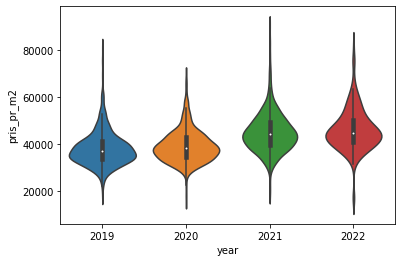

In [ ]:
ax = sns.violinplot(x="year", y="pris_pr_m2", data=silver_data_eda)

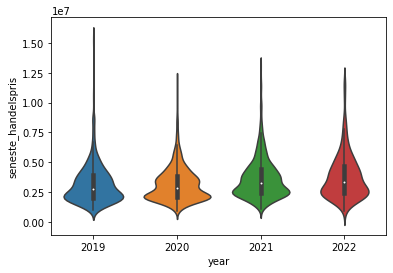

In [ ]:
ax = sns.violinplot(x="year", y="seneste_handelspris", data=silver_data_eda)

## Correlation 

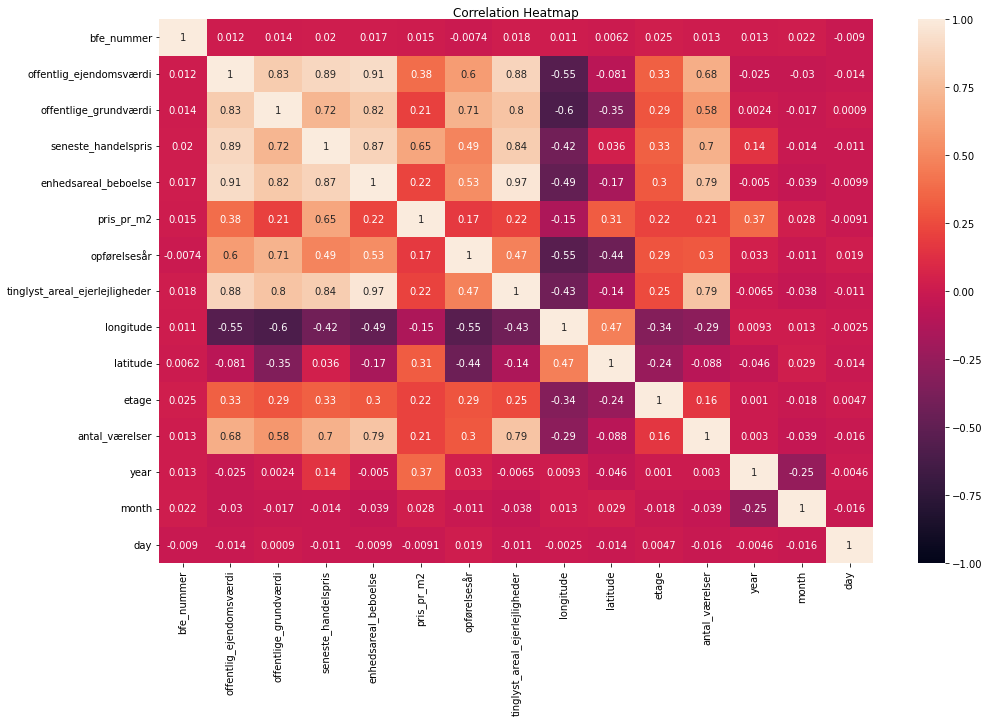

In [ ]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(silver_data_eda.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=1);

## Distribution 

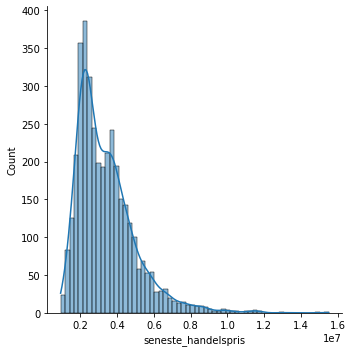

In [ ]:
sns.displot(data=silver_data_eda, x="seneste_handelspris", kde=True)

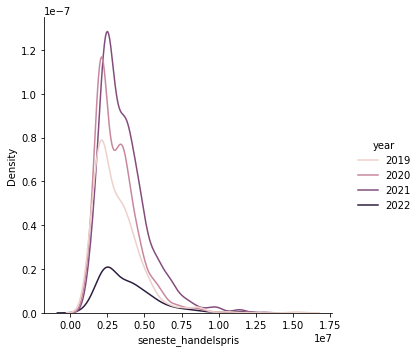

In [ ]:
sns.displot(data=silver_data_eda, x="seneste_handelspris", hue="year", kind="kde")

In [ ]:
#skewness
silver_data_eda.skew()

bfe_nummer                        61.169455
offentlig_ejendomsværdi            1.187929
offentlige_grundværdi              0.995796
seneste_handelspris                1.657192
enhedsareal_beboelse               0.722190
pris_pr_m2                         0.915160
opførelsesår                       0.108132
tinglyst_areal_ejerlejligheder     1.039122
longitude                         -0.384877
latitude                          -1.357140
husnr                              2.493493
etage                              1.048678
antal_værelser                     0.474237
year                              -0.047743
month                              0.025492
day                                1.558003
dtype: float64

array([[<AxesSubplot:title={'center':'bfe_nummer'}>,
        <AxesSubplot:title={'center':'offentlig_ejendomsværdi'}>,
        <AxesSubplot:title={'center':'offentlige_grundværdi'}>,
        <AxesSubplot:title={'center':'seneste_handelspris'}>],
       [<AxesSubplot:title={'center':'enhedsareal_beboelse'}>,
        <AxesSubplot:title={'center':'pris_pr_m2'}>,
        <AxesSubplot:title={'center':'seneste_handelsdato'}>,
        <AxesSubplot:title={'center':'opførelsesår'}>],
       [<AxesSubplot:title={'center':'tinglyst_areal_ejerlejligheder'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'etage'}>],
       [<AxesSubplot:title={'center':'antal_værelser'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>]], dtype=object)

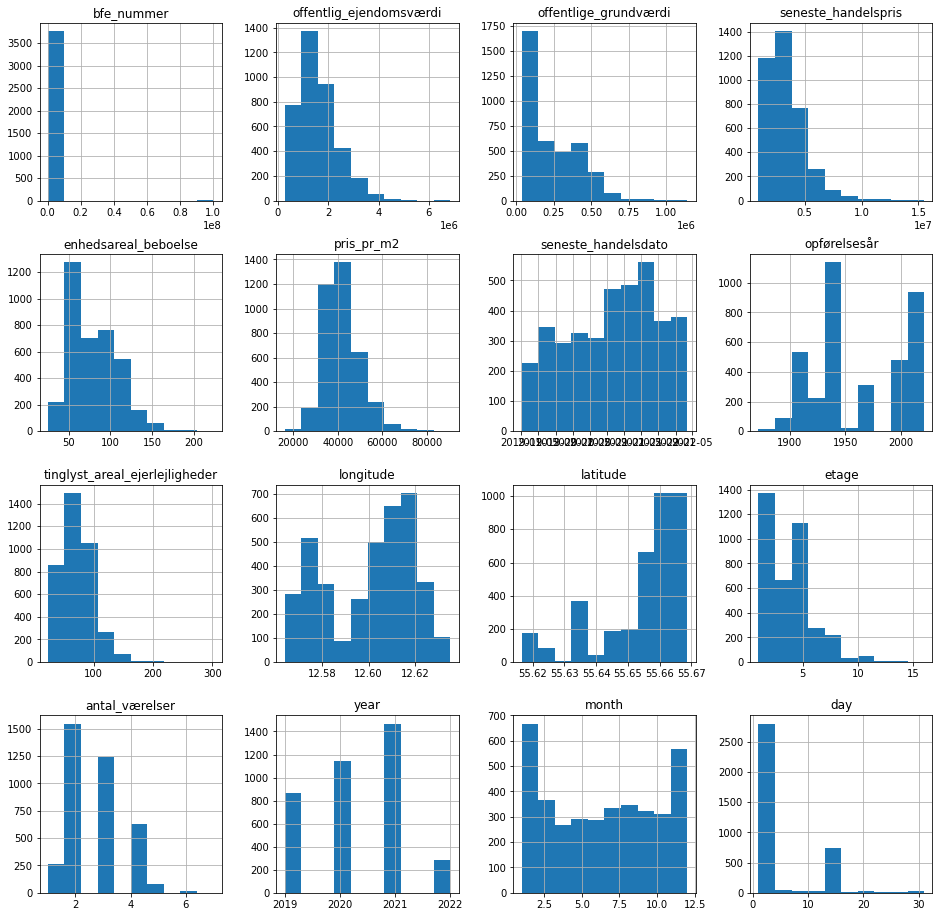

In [ ]:
silver_data_eda.hist(figsize=(16, 16))

# Save to CSV

In [ ]:
# pick if the dataset should be saved with or without the outliers 

# dataset without outliers
silver_without_outlier.to_csv("silver_data_eda.csv", index=False)

# dataset with outliers 
#silver_data_eda.to_csv("silver_data_eda.csv", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a2d9d23-5445-401b-81ac-9e4d2df66dba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>